In [1]:
%matplotlib notebook
import sys
from pathlib import Path

SRC_ROOT_DIR_0 = '/g/wsl_projs/practical-astronomy'
SRC_ROOT_DIR_1 = '/g/wsl_projs/practical-astronomy/myastro/'
sys.path.insert(0, SRC_ROOT_DIR_0)
sys.path.insert(1, SRC_ROOT_DIR_1)

%load_ext autoreload
%autoreload 2

In [48]:
import myastro.timeconv as tc
import myastro.coord as co
import myastro.orbit as ob
from myastro.orbit import OrbObject
from timeconv import  sin_dgms, cos_dgms, tan_dgms
import numpy as np
from toolz import pipe, compose
import toolz as tz
from functools import partial
from itertools import starmap
import myastro.util as ut
from operator import itemgetter

import matplotlib.pyplot as plt
from matplotlib import pyplot
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation
from matplotlib.patches import Ellipse



### Anomalies

<IPython.core.display.Javascript object>


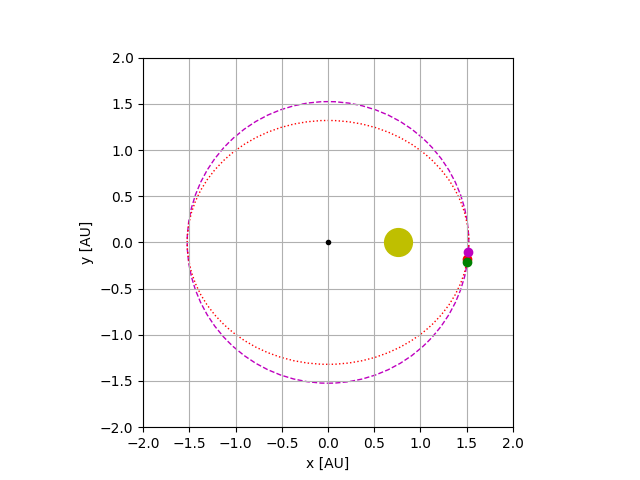

In [37]:
#------------------------------------------------------------
# set up initial state and global variables
e = 0.5     # excentrycity 
#e = 0.0934
a = 1.523688    # semi-major
f = a * e       # distrance from the center to the sun
b = a*np.sqrt(1 - e*e)
obj = OrbObject("Planet",e,a)
#time_range = np.linspace(0, 679, 4*680)
time_range = np.linspace(0, 679, 340)
#time_range = range(680)

#------------------------------------------------------------
# set up figure and animation

fig = plt.figure()
ax = fig.add_subplot(111, aspect='equal', autoscale_on=False, xlim=(-2, 2), ylim=(-2, 2))
ax.set_xlabel('x [AU]')
ax.set_ylabel('y [AU]')
ax.grid()

true_obj, = ax.plot([a], [0], 'ro')
#anot_t = plt.annotate('T', xy=(a,0))

eccentric_obj, = ax.plot([a], [0], 'go')
#anot_e = plt.annotate('e', xy=(a,0))

mean_obj, = ax.plot([a], [0], 'mo')
#anot_m = plt.annotate('m', xy=(a,0))

sun,  = ax.plot([f], [0], 'yo',ms=20)
center,  = ax.plot([0], [0], 'ko',ms =3)
circle1 = plt.Circle((0, 0), radius=a, color='m', fill=False, linestyle='--')
elipse1 = Ellipse((0,0), 2*a, 2*b, angle=0, fill=False, color='r',linestyle=':')
ax.add_patch(circle1)
ax.add_patch(elipse1)

def init():
    """initialize animation"""
    return mean_obj, eccentric_obj, true_obj

def animate(t):
    """perform animation step"""
    global obj 
    xt,yt,xm,ym,xe,ye = obj.step(t)
    mean_obj.set_data(xm,ym)
    eccentric_obj.set_data(xe,ye)
    true_obj.set_data(xt,yt)
    return mean_obj, eccentric_obj, true_obj

ani = FuncAnimation(fig, animate, frames=time_range, interval= 200, init_func=init, repeat=False, blit=True)

plt.show()

In [26]:
obj2 = OrbObject("Planet",e,a)
time_range = np.linspace(0, 680, 679)
for t in time_range :
    obj2.step(t)
dist_m = np.diff(np.fromiter(map(tc.norm_rad,obj2.get_mean_anomalies()),dtype=float))

<IPython.core.display.Javascript object>


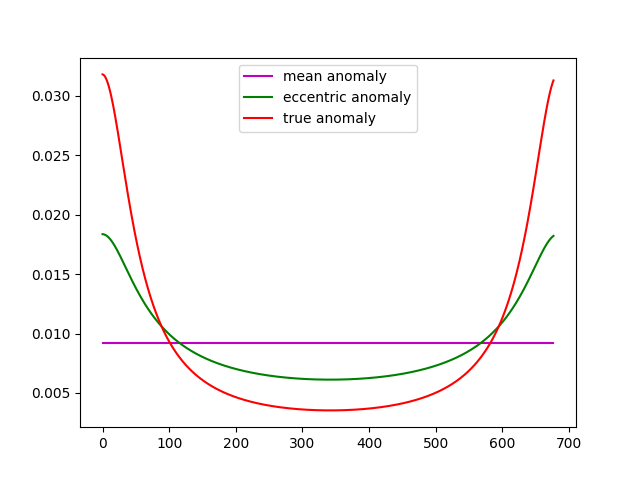

In [32]:
fig2 = plt.figure()
ax2 = plt.axes()
#https://stackoverflow.com/questions/35215161/most-efficient-way-to-map-function-over-numpy-array
dist_m = np.diff(np.fromiter(map(tc.norm_rad,obj2.get_mean_anomalies()),dtype=float))
dist_e = np.diff(np.fromiter(map(tc.norm_rad,obj2.get_eccentric_anomalies()),dtype=float))
dist_t = np.diff(np.fromiter(map(tc.norm_rad,obj2.get_true_anomalies()),dtype=float))
xs = range(len(dist_m))
ax2.plot(xs, dist_m ,color='m', label='mean anomaly')
ax2.plot(xs, dist_e ,color='g',label='eccentric anomaly')
ax2.plot(xs, dist_t ,color='red',label='true anomaly')
plt.legend();

### Several planets

<IPython.core.display.Javascript object>


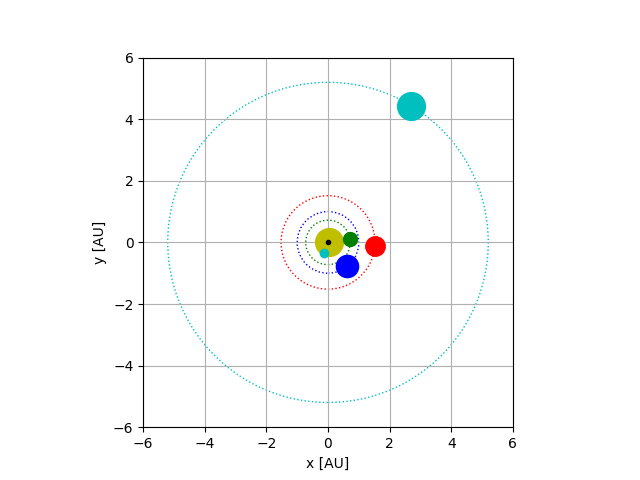

In [71]:
#------------------------------------------------------------
# set up initial state and global variables

# Mars
e_mars = 0.0934
a_mars = 1.524
mars = OrbObject("Mars",e_mars,a_mars)
# Venus
e_venus = 0.0068
a_venus = 0.72333
venus = OrbObject("Venus",e_venus,a_venus)
# Mercury
e_mercury = 0.205630
a_mercury = 0.387098 
mercury = OrbObject("Mercury",e_mercury,a_mercury)

# Earth
e_earth = 0.017
a_earth = 1
earth = OrbObject("Earth",e_earth,a_earth)

# Jupiter
e_jupiter = 0.048
a_jupiter = 5.203
jupiter = OrbObject("Jupiter",e_jupiter,a_jupiter)

#------------------------------------------------------------
# set up figure and animation

fig = plt.figure()
ax = fig.add_subplot(111, aspect='equal', autoscale_on=False, xlim=(-6, 6), ylim=(-6, 6))
ax.set_xlabel('x [AU]')
ax.set_ylabel('y [AU]')
ax.grid()

f = e_earth * a_earth
sun,  = ax.plot([f], [0], 'yo',ms=20)
center,  = ax.plot([0], [0], 'ko', ms =3)

earth_dot, = ax.plot([earth.a()], [0], 'bo',ms=16)
orb = Ellipse((0,0), 2*earth.a(), 2*earth.b(), angle=0, fill=False, color='b',linestyle=':')
ax.add_patch(orb)

mars_dot, = ax.plot([mars.a()], [0], 'ro',ms=14)
orb = Ellipse((0,0), 2*mars.a(), 2*mars.b(), angle=0, fill=False, color='r',linestyle=':')
ax.add_patch(orb)

venus_dot, = ax.plot([venus.a()], [0], 'go',ms=10)
orb = Ellipse((0,0), 2*venus.a(), 2*venus.b(), angle=0, fill=False, color='g',linestyle=':')
ax.add_patch(orb)

mercury_dot, = ax.plot([mercury.a()], [0], 'co',ms=6)
orb = Ellipse((0,0), 2*mercury.a(), 2*mercury.b(), angle=0, fill=False, color='c',linestyle=':')
ax.add_patch(orb)

jupiter_dot, = ax.plot([jupiter.a()], [0], 'co',ms=20)
orb = Ellipse((0,0), 2*jupiter.a(), 2*jupiter.b(), angle=0, fill=False, color='c',linestyle=':')
ax.add_patch(orb)

obj_dots=[(earth, earth_dot),(mercury,mercury_dot),(mars, mars_dot),(venus,venus_dot),(jupiter,jupiter_dot)]

def init():
    """initialize animation"""
    return tuple(map(itemgetter(1),obj_dots))

def animate(t):
    """perform animation step"""
    global obj_dots
    for obj, dot in obj_dots:
        xt,yt, *rest = obj.step(t)
        dot.set_data(xt,yt)
    return tuple(map(itemgetter(1),obj_dots))

ani = FuncAnimation(fig, animate, frames=time_range, interval= 200, init_func=init, repeat=False, blit=True)

#fig.set_size_inches(18.5, 10.5, forward=True)
plt.show()

In [4]:
# Orbial Elements for Mars
#N =  49.5574_deg + 2.11081E-5_deg   * d    (Long of asc. node)
#i =   1.8497_deg - 1.78E-8_deg      * d    (Inclination)
#w = 286.5016_deg + 2.92961E-5_deg   * d    (Argument of perihelion)
#a = 1.523688                               (Semi-major axis)
#e = 0.093405     + 2.516E-9         * d    (Eccentricity)
#M =  18.6021_deg + 0.5240207766_deg * d    (Mean anonaly)
#

# Eccentricity
#e = 0.093405
e = 0.7
# Semi-major axis
a = 1.523688
# f - distance from the centre of the orbit of the Sun in A.U.
f = a*e
# b - Semi-minor axis in A.U.
b = a*np.sqrt(1 - e*e)
# Orbital Period in days
orb_period = 686.97
# Center to Sun focus:
cs = a*e
# 
# M - mean anomaly
m_anomaly_func = partial(ob.m_anomaly,orb_period)
e_anomaly_func = partial(ob.solve_ke_newton,e,ob.e_anomaly_v1)
 



In [5]:
def t_anomaly(e, e_anomaly):
    return 2 * np.arctan(np.sqrt((1+e)/(1-e)) * np.tan(e_anomaly/2))
    
    

<IPython.core.display.Javascript object>


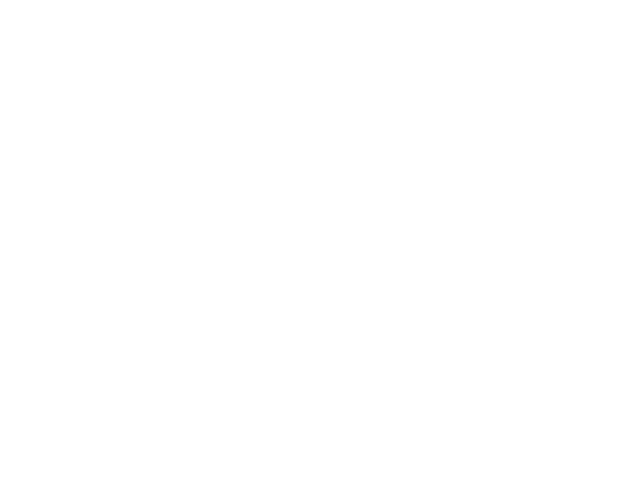

NameError: name 'b' is not defined

In [18]:
fig, ax = plt.subplots()
ax.set_xlabel('x [AU]')
ax.set_ylabel('y [AU]')
#t=0 --> means Mars in the perihelion

mars, = plt.plot([], [], 'ro')
anot_t = plt.annotate('T', xy=(a,0))

mars2, = plt.plot([], [], 'go')
anot_e = plt.annotate('e', xy=(a,0))
#anot_e.set_animated(True)

mars3, = plt.plot([], [], 'mo')
anot_m = plt.annotate('m', xy=(a,0))
#anot_m.set_animated(True)

#distance from the center to the occupied focus c2 = a2 - b2, a semi-major axis and b semi-minor
c = np.sqrt(a*a-b*b)
sun = plt.plot([c], [0], 'yo',ms=30)

center = plt.plot([0], [0], 'ko',ms =3)

def init():
    ax.set_xlim(-2, 2)
    ax.set_ylim(-2, 2)
    return mars, mars2, mars3,anot_t,anot_e,anot_m,

def update(t):   
    m_anomaly_dg = m_anomaly_func(t)
    x = a * cos_dgms(m_anomaly_dg)    
    y = a * sin_dgms(m_anomaly_dg)    
    mars.set_data(x, y)   
    anot_m.set_position((x,y))
    anot_m.xy = (x,y)

    e_anomaly_rad = ob.solve_ke_newton(e,ob.e_anomaly_v2,m_anomaly_dg)
    x = a * np.cos(e_anomaly_rad)
    y = b * np.sin(e_anomaly_rad)    
    mars2.set_data(x,y)
    anot_e.set_position((x,y))
    anot_e.xy = (x,y)

        
    t_anomaly_rad = t_anomaly(e,e_anomaly_rad)
    r = a * (1 - e*np.cos(t_anomaly_rad))
    x = r * np.cos(t_anomaly_rad) + (a*e)
    y = r * np.sin(t_anomaly_rad)        
    mars3.set_data(x,y)  
    anot_t.set_position((x,y))
    anot_t.xy = (x,y)

    
    return mars, mars2, mars3, anot_t,anot_e,anot_m,

ani = FuncAnimation(fig, update, frames=np.linspace(0, 680, 200),init_func=init, blit=True)
plt.show()

In [40]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Create initial data
data = np.array([[1,2,3,4,5], [7,4,9,2,3]])

# Create figure and axes
fig = plt.figure()
ax = plt.axes(xlim=(0, 20), ylim=(0, 20))

# Create initial objects
line, = ax.plot([], [], 'r-')
annotation = ax.annotate('A0', xy=(data[0][0], data[1][0]))
annotation.set_animated(True)

# Create the init function that returns the objects
# that will change during the animation process
def init():
    return line, annotation

# Create the update function that returns all the
# objects that have changed
def update(num):
    newData = np.array([[1 + num, 2 + num / 2, 3, 4 - num / 4, 5 + num],
                        [7, 4, 9 + num / 3, 2, 3]])
    line.set_data(newData)
    # This is not working i 1.2.1
    # annotation.set_position((newData[0][0], newData[1][0]))
    annotation.xytext = (newData[0][0], newData[1][0])
    return line, annotation

anim = animation.FuncAnimation(fig, update, frames=25, init_func=init,
                               interval=200, blit=True)
plt.show()


M 0.0, E 0.0, T 0.0
M 7.272396709240489, E 22.840874664303282, T 25.68159289884375
M 14.544793418480978, E 40.696875889466746, T 41.43978424422062
M 21.817190127721464, E 54.447675141152935, T 50.76632334513749
M 29.089586836961956, E 65.62028020303028, T 56.91215558138372
M 36.361983546202445, E 75.1249624743858, T 61.3553191790751
M 43.63438025544293, E 83.48219956729062, T 64.78840056614573
M 50.906776964683424, E 91.0076206724695, T 67.5710980143712
M 58.17917367392391, E 97.9050918883731, T 69.9082508950291
M 65.4515703831644, E 104.31357957625187, T 71.92547673395381
M 72.72396709240489, E 110.33211598181205, T 73.70449928450026
M 79.99636380164537, E 116.03392203005275, T 75.30109014635572
M 87.26876051088585, E 121.4748381404365, T 76.75484236623537
M 94.54115722012635, E 126.6985966546819, T 78.09481485921287
M 101.81355392936685, E 131.74025364551483, T 79.34295609654005
M 109.08595063860733, E 136.62850147996383, T 80.51626929469106
M 116.35834734784783, E 141.38727538483684

In [41]:
fig, ax = plt.subplots()
#t=0 --> means Mars in the perihelion
mars, = plt.plot([], [], 'ro')
mars2, = plt.plot([], [], 'go')
mars3, = plt.plot([], [], 'mo')
#distance from the center to the occupied focus c2 = a2 - b2, a semi-major axis and b semi-minor
c = np.sqrt(a*a-b*b)
sun = plt.plot([c], [0], 'yo')
center = plt.plot([0], [0], 'ko')

def init():
    ax.set_xlim(-2, 2)
    ax.set_ylim(-2, 2)
    return mars, mars2,

def update(t):   
    m_anomaly_dg = m_anomaly_func(t)
    e_anomaly_rad = ob.solve_ke_newton(e,ob.e_anomaly_v2,m_anomaly_dg)
    x = a * cos_dgms(m_anomaly_dg)    
    y = a * sin_dgms(m_anomaly_dg)    
    mars.set_data(x, y)    
    xx = a * np.cos(e_anomaly_rad)
    yy = b * np.sin(e_anomaly_rad)    
    mars2.set_data(xx,yy)
    return mars, mars2,

ani = FuncAnimation(fig, update, frames=np.linspace(0, 680, 100),init_func=init, blit=True)
plt.show()

1.068232350020389 1.0865103624512362


(array([0.        , 0.01409238, 0.02818356, 0.04227233, 0.05635748,
        0.07043781, 0.08451211, 0.09857919, 0.11263783, 0.12668684,
        0.14072501, 0.15475114, 0.16876403, 0.18276249, 0.19674531,
        0.21071131, 0.22465927, 0.23858802, 0.25249636, 0.2663831 ,
        0.28024706, 0.29408704, 0.30790186, 0.32169034, 0.33545131,
        0.34918358, 0.36288598, 0.37655734, 0.39019648, 0.40380225,
        0.41737347, 0.43090899, 0.44440765, 0.45786829, 0.47128977,
        0.48467093, 0.49801063, 0.51130772, 0.52456108, 0.53776957,
        0.55093205, 0.56404741, 0.57711451, 0.59013225, 0.6030995 ,
        0.61601517, 0.62887813, 0.6416873 , 0.65444158, 0.66713988,
        0.6797811 , 0.69236418, 0.70488803, 0.71735158, 0.72975376,
        0.74209352, 0.7543698 , 0.76658155, 0.77872772, 0.79080728,
        0.80281918, 0.81476242, 0.82663595, 0.83843877, 0.85016987,
        0.86182824, 0.87341289, 0.88492283, 0.89635706, 0.90771462,
        0.91899453, 0.93019582, 0.94131755, 0.95

1.0782356468509635 1.0765839545543507
1.088146707824313 1.0665654520914827


<IPython.core.display.Javascript object>


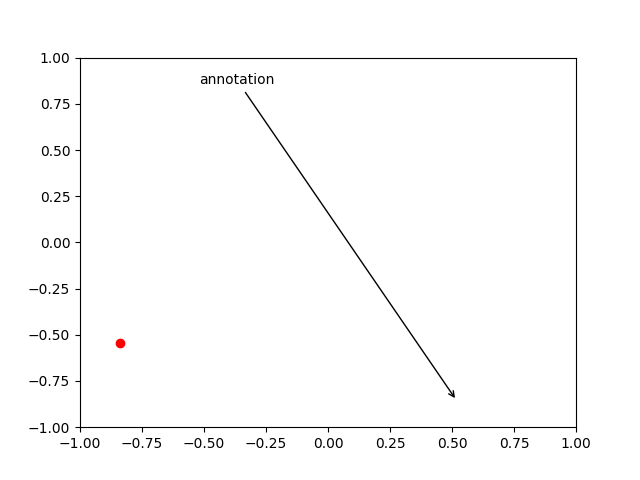

In [74]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.animation as animation

fig, ax = plt.subplots()

ax.set_xlim([-1,1])
ax.set_ylim([-1,1])

L = 50
theta = np.linspace(0,2*np.pi,L)
r = np.ones_like(theta)

x = r*np.cos(theta)
y = r*np.sin(theta)

line, = ax.plot(1,0, 'ro')

annotation = ax.annotate(
    'annotation', xy=(1,0), xytext=(-1,0),
    arrowprops = {'arrowstyle': "->"}
)

def update(i):

    new_x = x[i%L]
    new_y = y[i%L]
    line.set_data(new_x,new_y)

    ##annotation.xytext = (-new_x,-new_y) <-- does not work
    annotation.set_position((-new_x,-new_y))
    annotation.xy = (new_x,new_y)

    return line, annotation

ani = animation.FuncAnimation(
    fig, update, interval = 500, blit = False
)

plt.show()

<IPython.core.display.Javascript object>


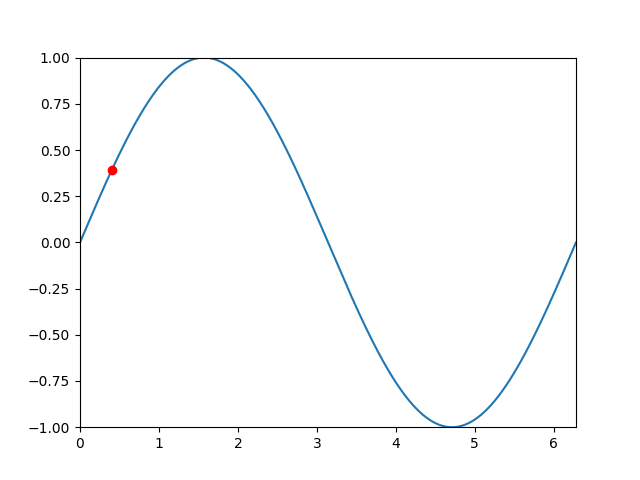

In [9]:
TWOPI = 2*np.pi

fig, ax = plt.subplots()

t = np.arange(0.0, TWOPI, 0.001)
s = np.sin(t)
l = plt.plot(t, s)

ax = plt.axis([0,TWOPI,-1,1])

redDot, = plt.plot([0], [np.sin(0)], 'ro')

def animate(i):
    redDot.set_data(i, np.sin(i))
    return redDot,

# create animation using the animate() function
myAnimation = animation.FuncAnimation(fig, animate, frames=np.arange(0.0, TWOPI, 0.1), \
                                      interval=10, blit=True, repeat=True)

plt.show()

<IPython.core.display.Javascript object>


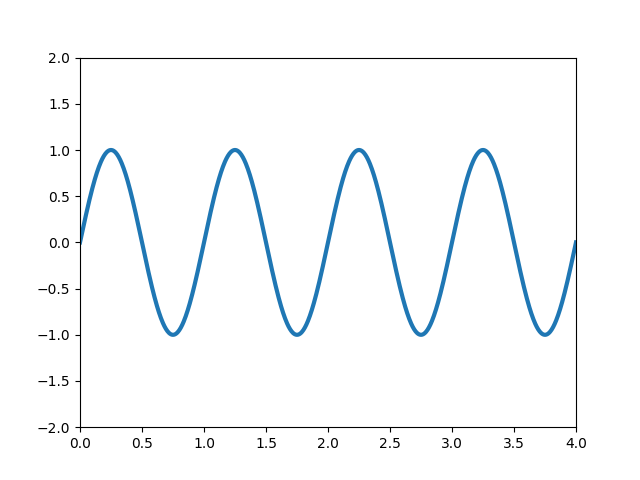

In [16]:
from matplotlib import pyplot as plt 
import numpy as np 
from matplotlib.animation import FuncAnimation  
   
# initializing a figure in  
# which the graph will be plotted 
fig = plt.figure()  
   
# marking the x-axis and y-axis 
axis = plt.axes(xlim =(0, 4),  ylim =(-2, 2))  
  
# initializing a line variable 
line, = axis.plot([], [], lw = 3)  
   
# data which the line will  
# contain (x, y) 
def init():  
    line.set_data([], []) 
    return line, 
   
def animate(i): 
    x = np.linspace(0, 4, 1000) 
   
    # plots a sine graph 
    y = np.sin(2 * np.pi * (x - 0.01 * i)) 
    line.set_data(x, y) 
      
    return line, 
   
anim = FuncAnimation(fig, animate, init_func = init, frames = 200, interval = 20, blit = True)

<IPython.core.display.Javascript object>


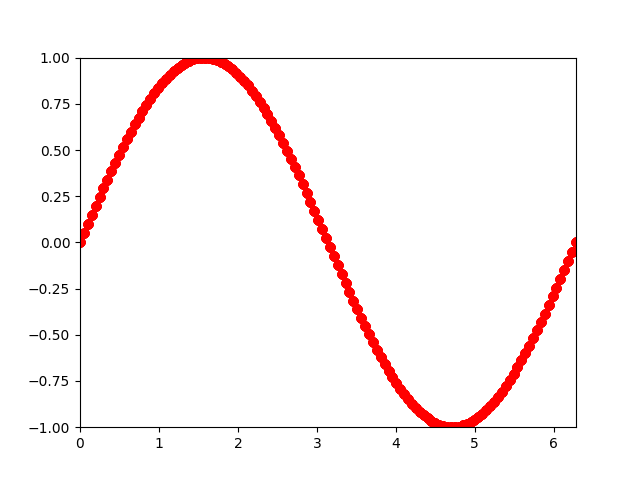

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

fig, ax = plt.subplots()
xdata, ydata = [], []
ln, = plt.plot([], [], 'ro')

def init():
    ax.set_xlim(0, 2*np.pi)
    ax.set_ylim(-1, 1)
    return ln,

def update(frame):
    xdata.append(frame)
    ydata.append(np.sin(frame))
    ln.set_data(xdata, ydata)
    return ln,

ani = FuncAnimation(fig, update, frames=np.linspace(0, 2*np.pi, 128),
                    init_func=init, blit=True)
plt.show()

<IPython.core.display.Javascript object>


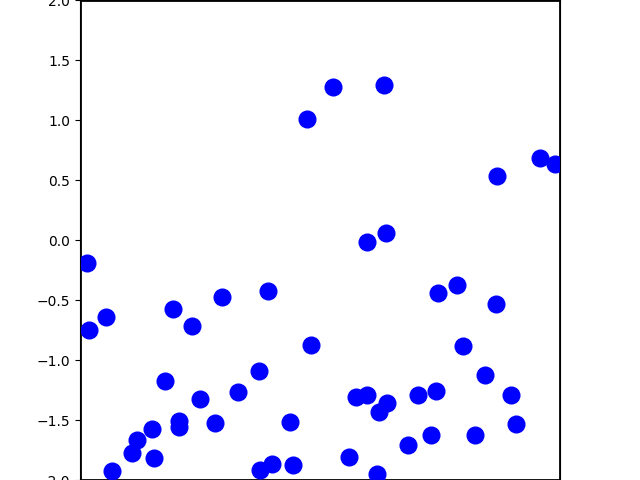

In [11]:
"""
Animation of Elastic collisions with Gravity

author: Jake Vanderplas
email: vanderplas@astro.washington.edu
website: http://jakevdp.github.com
license: BSD
Please feel free to use and modify this, but keep the above information. Thanks!
"""
import numpy as np
from scipy.spatial.distance import pdist, squareform

import matplotlib.pyplot as plt
import scipy.integrate as integrate
import matplotlib.animation as animation

class ParticleBox:
    """Orbits class
    
    init_state is an [N x 4] array, where N is the number of particles:
       [[x1, y1, vx1, vy1],
        [x2, y2, vx2, vy2],
        ...               ]

    bounds is the size of the box: [xmin, xmax, ymin, ymax]
    """
    def __init__(self,
                 init_state = [[1, 0, 0, -1],
                               [-0.5, 0.5, 0.5, 0.5],
                               [-0.5, -0.5, -0.5, 0.5]],
                 bounds = [-2, 2, -2, 2],
                 size = 0.04,
                 M = 0.05,
                 G = 9.8):
        self.init_state = np.asarray(init_state, dtype=float)
        self.M = M * np.ones(self.init_state.shape[0])
        self.size = size
        self.state = self.init_state.copy()
        self.time_elapsed = 0
        self.bounds = bounds
        self.G = G

    def step(self, dt):
        """step once by dt seconds"""
        self.time_elapsed += dt
        
        # update positions
        self.state[:, :2] += dt * self.state[:, 2:]

        # find pairs of particles undergoing a collision
        D = squareform(pdist(self.state[:, :2]))
        ind1, ind2 = np.where(D < 2 * self.size)
        unique = (ind1 < ind2)
        ind1 = ind1[unique]
        ind2 = ind2[unique]

        # update velocities of colliding pairs
        for i1, i2 in zip(ind1, ind2):
            # mass
            m1 = self.M[i1]
            m2 = self.M[i2]

            # location vector
            r1 = self.state[i1, :2]
            r2 = self.state[i2, :2]

            # velocity vector
            v1 = self.state[i1, 2:]
            v2 = self.state[i2, 2:]

            # relative location & velocity vectors
            r_rel = r1 - r2
            v_rel = v1 - v2

            # momentum vector of the center of mass
            v_cm = (m1 * v1 + m2 * v2) / (m1 + m2)

            # collisions of spheres reflect v_rel over r_rel
            rr_rel = np.dot(r_rel, r_rel)
            vr_rel = np.dot(v_rel, r_rel)
            v_rel = 2 * r_rel * vr_rel / rr_rel - v_rel

            # assign new velocities
            self.state[i1, 2:] = v_cm + v_rel * m2 / (m1 + m2)
            self.state[i2, 2:] = v_cm - v_rel * m1 / (m1 + m2) 

        # check for crossing boundary
        crossed_x1 = (self.state[:, 0] < self.bounds[0] + self.size)
        crossed_x2 = (self.state[:, 0] > self.bounds[1] - self.size)
        crossed_y1 = (self.state[:, 1] < self.bounds[2] + self.size)
        crossed_y2 = (self.state[:, 1] > self.bounds[3] - self.size)

        self.state[crossed_x1, 0] = self.bounds[0] + self.size
        self.state[crossed_x2, 0] = self.bounds[1] - self.size

        self.state[crossed_y1, 1] = self.bounds[2] + self.size
        self.state[crossed_y2, 1] = self.bounds[3] - self.size

        self.state[crossed_x1 | crossed_x2, 2] *= -1
        self.state[crossed_y1 | crossed_y2, 3] *= -1

        # add gravity
        self.state[:, 3] -= self.M * self.G * dt


#------------------------------------------------------------
# set up initial state
np.random.seed(0)
init_state = -0.5 + np.random.random((50, 4))
init_state[:, :2] *= 3.9

box = ParticleBox(init_state, size=0.04)
dt = 1. / 30 # 30fps


#------------------------------------------------------------
# set up figure and animation
fig = plt.figure()
fig.subplots_adjust(left=0, right=1, bottom=0, top=1)
ax = fig.add_subplot(111, aspect='equal', autoscale_on=False,
                     xlim=(-3.2, 3.2), ylim=(-2.4, 2.4))

# particles holds the locations of the particles
particles, = ax.plot([], [], 'bo', ms=6)

# rect is the box edge
rect = plt.Rectangle(box.bounds[::2],
                     box.bounds[1] - box.bounds[0],
                     box.bounds[3] - box.bounds[2],
                     ec='none', lw=2, fc='none')
ax.add_patch(rect)

def init():
    """initialize animation"""
    global box, rect
    particles.set_data([], [])
    rect.set_edgecolor('none')
    return particles, rect

def animate(i):
    """perform animation step"""
    global box, rect, dt, ax, fig
    box.step(dt)

    ms = int(fig.dpi * 2 * box.size * fig.get_figwidth()
             / np.diff(ax.get_xbound())[0])
    
    # update pieces of the animation
    rect.set_edgecolor('k')
    particles.set_data(box.state[:, 0], box.state[:, 1])
    particles.set_markersize(ms)
    return particles, rect

ani = animation.FuncAnimation(fig, animate, frames=600,
                              interval=10, blit=True, init_func=init)


# save the animation as an mp4.  This requires ffmpeg or mencoder to be
# installed.  The extra_args ensure that the x264 codec is used, so that
# the video can be embedded in html5.  You may need to adjust this for
# your system: for more information, see
# http://matplotlib.sourceforge.net/api/animation_api.html
#ani.save('particle_box.mp4', fps=30, extra_args=['-vcodec', 'libx264'])

plt.show()